In [1]:
#get to know your data

import pandas as pd
import numpy as np
df=pd.read_csv('tested.csv')
print("Shape: ",df.shape)
df.head()

Shape:  (418, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [2]:
#changing it to a boolean form for using it in the algorithm
df['IsFemale']=df.Sex=='female'

In [3]:
df.count()

PassengerId    418
Survived       418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
IsFemale       418
dtype: int64

In [4]:
#checking for null values in the columns
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
IsFemale         0
dtype: int64

In [5]:
#taking care of the null values by copying values from the previous one
df['Age'] = df['Age'].fillna(method ='pad').astype(np.int64)
df['IsFemale'] = df['IsFemale'].fillna(method ='pad').astype(np.int64)
df['Fare'] = df['Fare'].fillna(method ='pad')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsFemale
0,892,0,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,NaN,Q,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,NaN,S,1
2,894,0,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,NaN,Q,0
3,895,0,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,NaN,S,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,NaN,S,1


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
IsFemale         0
dtype: int64

In [7]:
#making a new column named family
df['Family']=df['SibSp']+df['Parch']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsFemale,Family
0,892,0,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,NaN,Q,0,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,NaN,S,1,1
2,894,0,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,NaN,Q,0,0
3,895,0,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,NaN,S,0,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,NaN,S,1,2


In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'IsFemale', 'Family'],
      dtype='object')

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,IsFemale,Family
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.090909,0.447368,0.392344,35.560845,0.363636,0.839713
std,120.810458,0.481622,0.841838,13.925680,0.896760,0.981429,55.856972,0.481622,1.519072
min,892.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200,0.000000,0.000000
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.471875,1.000000,1.000000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000,10.000000


In [29]:
#measuring asymmetry in the data
df.skew(numeric_only=True).sort_values(ascending=False)

Fare        3.691621
Family      3.168542
Survived    0.568991
IsFemale    0.568991
Age         0.434932
Pclass     -0.534170
dtype: float64

In [11]:
#dropping unneccesary columns
df.drop(['PassengerId','Name','SibSp','Parch','Cabin','Ticket'],axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsFemale,Family
0,0,3,male,34,7.8292,Q,0,0
1,1,3,female,47,7.0000,S,1,1
2,0,2,male,62,9.6875,Q,0,0
3,0,3,male,27,8.6625,S,0,0
4,1,3,female,22,12.2875,S,1,2


0    266
1    152
Name: Survived, dtype: int64


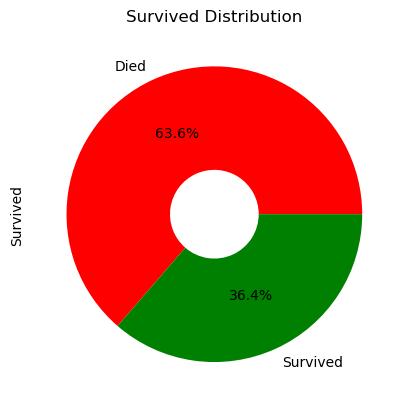

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
print(df.Survived.value_counts())
ax=df.Survived.value_counts().plot(kind='pie',colors=['red','green'], autopct='%1.1f%%', labels=['Died','Survived'], wedgeprops={'width': 0.7})
plt.title("Survived Distribution")
plt.show()

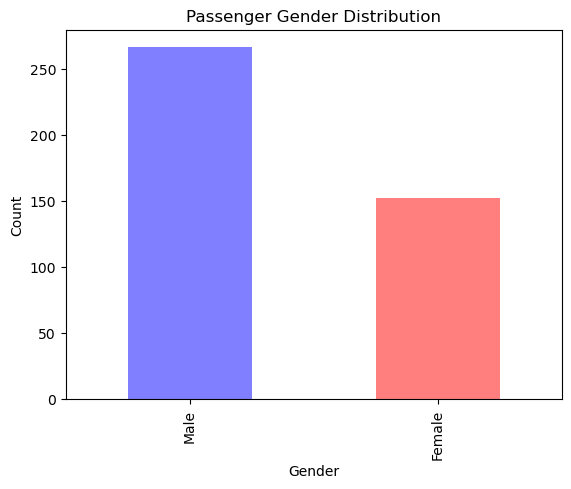

In [13]:
ax = df['IsFemale'].value_counts().plot(kind='bar', color=['b', 'r'], alpha=0.5)
ax.set_xticklabels(['Male', 'Female'])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Passenger Gender Distribution")
plt.show()

In [14]:
#according to this, all females survived(1.0) and all males died(1.0)
df.groupby('IsFemale')[['Survived', 'Pclass', 'Age', 'Family', 'Fare']].mean()

,Survived,Pclass,Age,Family,Fare
IsFemale,,,,,
0,0.0,2.334586,30.413534,0.654135,27.454072
1,1.0,2.144737,29.526316,1.164474,49.747699


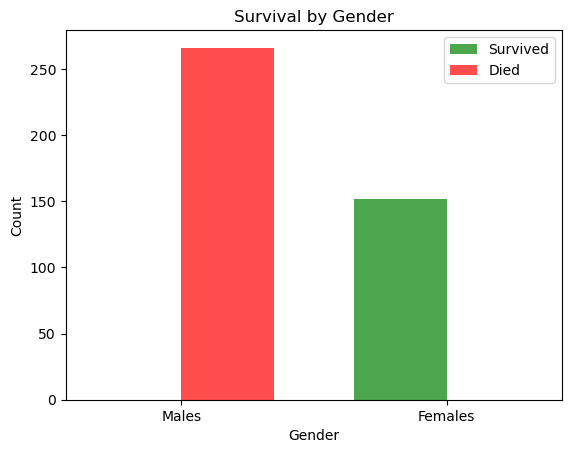

In [30]:
male_survived = df[(df['IsFemale'] == 0) & (df['Survived'] == 1)].shape[0]
male_died = df[(df['IsFemale'] == 0) & (df['Survived'] == 0)].shape[0]
female_survived = df[(df['IsFemale'] == 1) & (df['Survived'] == 1)].shape[0]
female_died = df[(df['IsFemale'] == 1) & (df['Survived'] == 0)].shape[0]

categories = ['Males', 'Females']
survived_count = [male_survived, female_survived]
died_count = [male_died, female_died]
bar_width = 0.35
index = range(len(categories))
plt.bar(index, survived_count, bar_width, label='Survived', color='green', alpha=0.7)
plt.bar([i + bar_width for i in index], died_count, bar_width, label='Died', color='red', alpha=0.7)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Survival by Gender')
plt.xticks([i + bar_width / 2 for i in index], categories)
plt.legend()
plt.show()


In [ ]:
#This graph too shows the same

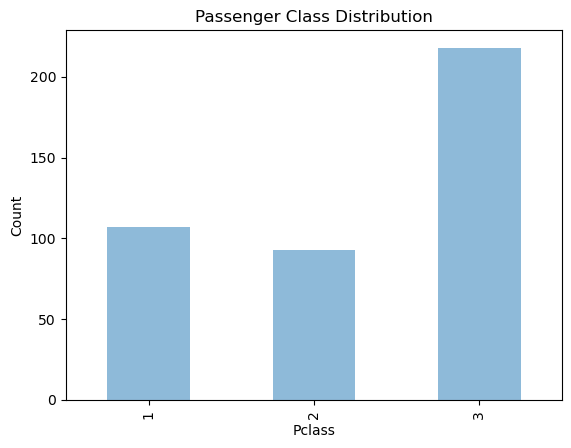

In [16]:
ax = df.Pclass.value_counts().sort_index().plot(kind='bar',alpha=0.5)
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.title("Passenger Class Distribution")
plt.show()

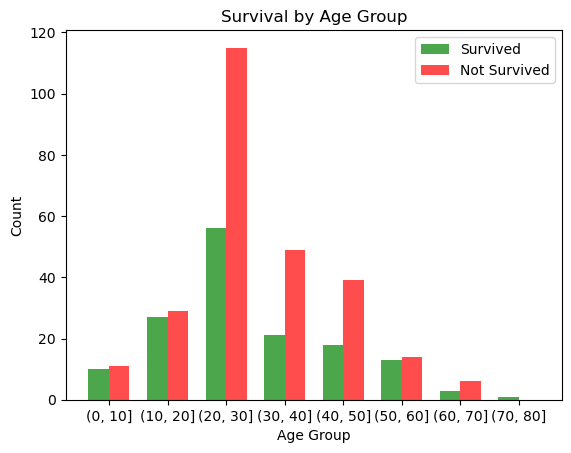

In [17]:
bins=[0,10,20,30,40,50,60,70,80]
df['AgeBin']=pd.cut(df.Age,bins)
survived_counts = df[df.Survived == 1].AgeBin.value_counts().sort_index()
not_survived_counts = df[df.Survived == 0].AgeBin.value_counts().sort_index()

x = range(len(survived_counts))
bar_width = 0.35
plt.bar(x, survived_counts, width=bar_width, label='Survived', color='green', alpha=0.7)
plt.bar([i + bar_width for i in x], not_survived_counts, width=bar_width, label='Not Survived', color='red', alpha=0.7)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Survival by Age Group')
plt.xticks([i + bar_width / 2 for i in x], survived_counts.index)
plt.legend()
plt.show()

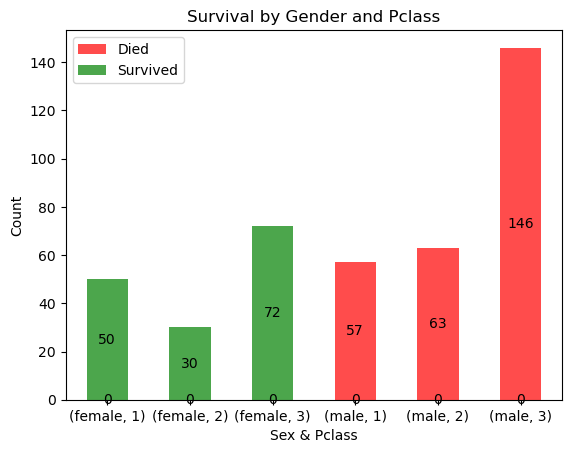

In [18]:
data = df.groupby(['Sex', 'Pclass', 'Survived']).size().unstack()
ax = data.plot(kind='bar', stacked=True, color=['red', 'green'], alpha=0.7)
plt.title('Survival by Gender and Pclass')
plt.xlabel('Sex & Pclass')
plt.ylabel('Count')
plt.xticks(range(len(data.index)), [f'({female}, {pclass})' for female, pclass in data.index], rotation=0)
plt.legend(['Died', 'Survived'])
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center')
plt.show()

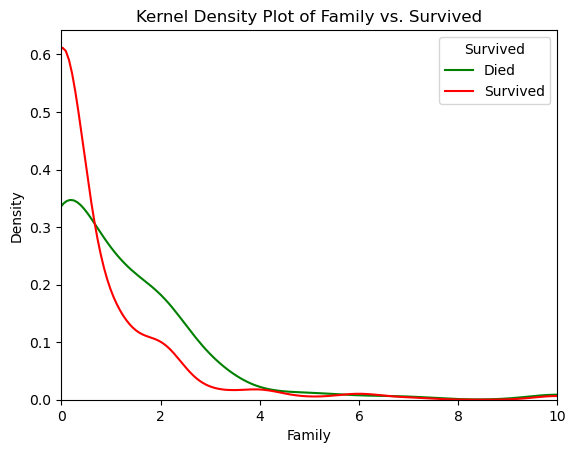

In [19]:
import seaborn as sns

sns.kdeplot(data=df, x='Family', hue='Survived', common_norm=False, fill=False, palette={0: 'red', 1: 'green'})
plt.title('Kernel Density Plot of Family vs. Survived')
plt.xlabel('Family')
plt.ylabel('Density')
plt.legend(title='Survived', labels=['Died', 'Survived'])
plt.xlim(0, df['Family'].max())
plt.show()


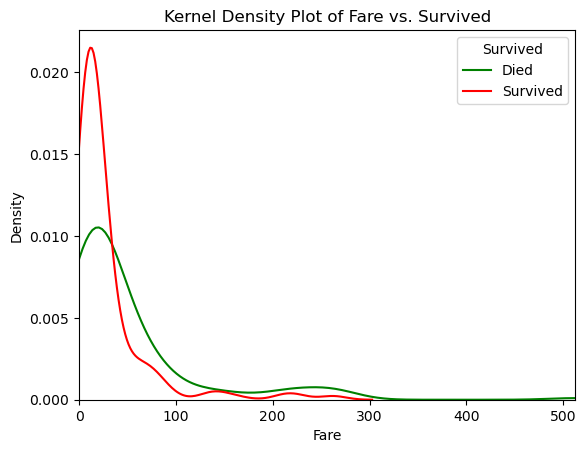

In [20]:
import seaborn as sns
sns.kdeplot(data=df, x='Fare', hue='Survived', common_norm=False, fill=False, palette={0: 'red', 1: 'green'})
plt.title('Kernel Density Plot of Fare vs. Survived')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.legend(title='Survived', labels=['Died', 'Survived'])
plt.xlim(0, df['Fare'].max())
plt.show()


In [21]:
df.corr(numeric_only=True)

,Survived,Pclass,Age,Fare,IsFemale,Family
Survived,1.000000,-0.108615,-0.030685,0.192225,1.000000,0.161803
Pclass,-0.108615,1.000000,-0.391954,-0.577488,-0.108615,0.012736
Age,-0.030685,-0.391954,1.000000,0.294220,-0.030685,-0.058145
Fare,0.192225,-0.577488,0.294220,1.000000,0.192225,0.250417
IsFemale,1.000000,-0.108615,-0.030685,0.192225,1.000000,0.161803
Family,0.161803,0.012736,-0.058145,0.250417,0.161803,1.000000


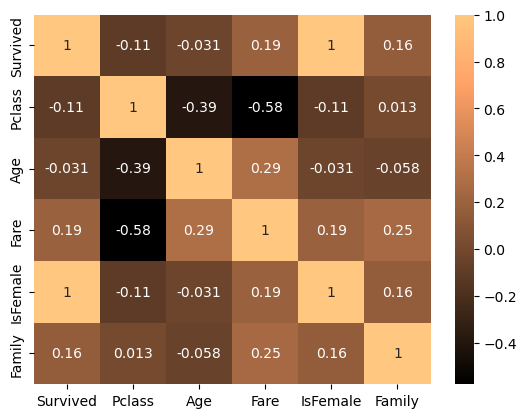

In [22]:
sns.heatmap(df.corr(numeric_only=True), cmap="copper", annot = True)
plt.show()

In [23]:
features=['Pclass', 'Age', 'Family', 'Fare', 'IsFemale']
X=df[features]
y=df.Survived
X.head()

,Pclass,Age,Family,Fare,IsFemale
0,3,34,0,7.8292,0
1,3,47,1,7.0000,1
2,2,62,0,9.6875,0
3,3,27,0,8.6625,0
4,3,22,2,12.2875,1


In [24]:
#data is split into training and testing data
#smote is used to generate synthetic examples for the minority class, helping to balance the dataset
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
train_X, test_X, train_y, test_y=train_test_split(X,y,train_size=0.7,random_state=1)

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(train_X, train_y)

model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

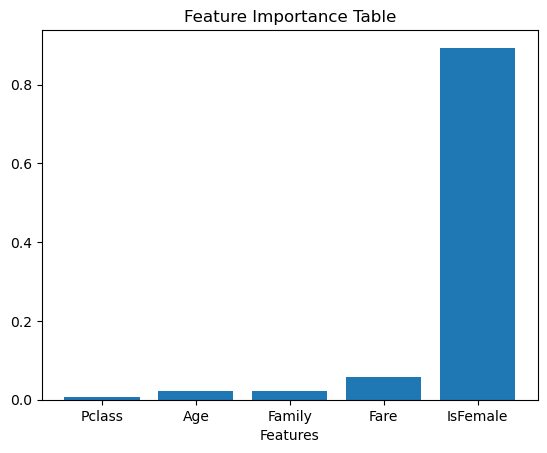

In [25]:
#the most important feature of all being IsFemale as according to the data, all females have survived and all males have died
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(range(len(features)),model.feature_importances_,tick_label=features)
plt.xlabel('Features')
plt.title('Feature Importance Table')
plt.show()

In [26]:
#import eli5
#from eli5.sklearn import PermutationImportance
#perm = PermutationImportance(model, random_state=42).fit(test_X, test_y)
#eli5.show_weights(perm, feature_names = features)

In [27]:
from sklearn.metrics import accuracy_score
y_predicted=model.predict(test_X)
print("Accuracy=",accuracy_score(test_y,y_predicted))

Accuracy= 1.0


In [28]:
def mean_error(test_y, y_predicted): 
    total_error = 0
    for true, pred in zip(test_y, y_predicted):
        total_error += abs(true - pred)
    
    mean_error = total_error / len(test_y)
    return mean_error
print('MAE: ',mean_error(test_y, y_predicted))

MAE:  0.0
